In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
save_folder = "../plots/notebook_plots/dataset_viz/"

In [4]:
label_dict = {
    "fft": {
        "input_labels":[
            # NB: cache_bandwith is missing!
            'cycle_time',
            'pipelining',
            'cache_size',
            'cache_assoc',
            'cache_hit_latency',
            'cache_line_sz',
            'cache_queue_size',
            'tlb_hit_latency',
            'tlb_miss_latency',
            'tlb_page_size',
            'tlb_entries',
            'tlb_max_outstanding_walks',
            'tlb_assoc',
            'tlb_bandwidth',
            'l2cache_size',
            'enable_l2',
            'pipelined_dma',
            'ignore_cache_flush',
        ],
        "output_labels":[
            'cycle',
            'avg_power',
            'idle_fu_cycles',
            'avg_fu_power',
            'avg_fu_dynamic_power',
            'avg_fu_leakage_power',
            'avg_mem_power',
            'avg_mem_dynamic_power',
            'avg_mem_leakage_power',
            'total_area',
            'fu_area',
            'mem_area',
            'num_double_precision_fp_multipliers',
            'num_double_precision_fp_adders',
            # 'num_trigonometric_units',
            # 'num_bit-wise_operators_32',
            # 'num_shifters_32',
            'num_registers_32',
        ]
        
    },
    "stencil3d": {
        "input_labels": [
            'cycle_time',
            'cache_size',
            'cache_assoc',
            'cache_hit_latency',
            'tlb_hit_latency',
            'tlb_entries',
            'l2cache_size',
        ],

        "output_labels": [
            'cycle',
            'avg_power',
            'fu_power',
            'avg_fu_dynamic_power',
            'avg_fu_leakage_power',
            'avg_mem_power',
            'avg_mem_dynamic_power',
            'avg_mem_leakage_power',
            'total_area',
            'fu_area',
            'mem_area',
            # 'num_sp_multiplier',
            # 'num_sp_adder',
            # 'num_dp_multiplier',
            # 'num_dp_adder',
            # 'num_trig_unit',
            # 'num_multiplier',
            # 'num_adder',
            # 'num_bit_wise',
            # 'num_shifter',
            'num_register',
        ]
    },
    "gemm": {
        "input_labels": [
            'cycle_time',
            'cache_size',
            'cache_assoc',
            'cache_hit_latency',
            'tlb_hit_latency',
            'tlb_entries',
            'l2cache_size',
        ],

        "output_labels": [
            'cycle',
            'avg_power',
            'fu_power',
            'avg_fu_dynamic_power',
            'avg_fu_leakage_power',
            'avg_mem_power',
            'avg_mem_dynamic_power',
            'avg_mem_leakage_power',
            'total_area',
            'fu_area',
            'mem_area',
            # 'num_sp_multiplier',
            # 'num_sp_adder',
            # 'num_dp_multiplier',
            # 'num_dp_adder',
            # 'num_trig_unit',
            # 'num_multiplier',
            # 'num_adder',
            # 'num_bit_wise',
            # 'num_shifter',
            'num_register',
        ]
    },
    "smaug": {
        "input_labels": [
            "num_threads",
            "l2_assoc",
            "accel_clock_time",
            "dma",
            "acp",
            "num_accels",
            "l2_size",
        ],

        "output_labels": [
            "total_time",
            "total_accel_time",
            "total_energy",
            "fu_energy",
            "spad_energy",
            "llc_leakage_energy",
            "llc_dynamic_energy",
            "total_area",
            "fu_area",
            "mem_area",
            # "num_sp_multiplier",
            # "num_sp_adder",
            # "num_dp_multiplier",
            # "num_dp_adder",
            # "num_trig_unit",
            "num_multiplier",
            "num_adder",
            "num_bit_wise",
            "num_shifter",
            "num_register"
        ]
    }
}

In [6]:
# Generate histograms summarizing data

def generate_histograms(data: pd.DataFrame, name: str, show=True, save=True, transforms={}):
    num_plots = len(data.columns)
    num_cols = 4
    num_rows = num_plots // num_cols + bool(num_plots % num_cols)
    
    for label, transform in transforms.items():
        data[label] = data[label].apply(transform)

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 4, num_rows * 4))
    fig.suptitle(f"Plot of {name}", fontsize=18)

    for column, ax in zip(data, axes.flatten()):
        ax.hist(data[column], bins=50, density=False, edgecolor='black')
        ax.set_xlabel(column)

    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    
    fig_path = save_folder + name + ".pdf"
    
    if save:
        fig.savefig(fig_path)
        print(f"Saved figure to {fig_path}!")
    
    if show:
        fig.show()

In [7]:
def analysis(dataset_path: str, 
             name: str, 
             sep: str,
             input_labels,
             output_labels,
             input_transforms={},
             output_transforms={}):
    
    with open(dataset_path) as f:
        df = pd.read_csv(f, sep=sep, dtype=np.float64)

    print("==============================================")
    print(f"Summary: {name}")
    print("----------------------------------------------")
    print('Number of rows:', len(df))
    print()

    duplicated_rows = df.duplicated(keep=False)
    print('Duplicated rows:', sum(duplicated_rows))
    print()

    all_the_same = df.apply(func=lambda c: all(c[0] == c), axis=0)
    print('Only one value in columns:', all_the_same[all_the_same].index.tolist())
    print()
    
    
    df = df[input_labels + output_labels]

    print('Final inputs:', input_labels)
    print()
    print('Final outputs:', output_labels)
    print("==============================================\n")

    generate_histograms(df[input_labels], name=f'{name}_inputs', show=True, save=True, transforms=input_transforms)
    generate_histograms(df[output_labels], name=f'{name}_outputs', show=True, save=True, transforms=output_transforms)

In [8]:
fft_path = "../resources/fft_dataset.csv"
stencil3d_path = "../resources/stencil3d_dataset.csv"
gemm_path = "../resources/gemm_dataset.csv"
smaug_path = "../resources/smaug_dataset.csv"

# Analysis of the FFT dataset

Summary: fft
----------------------------------------------
Number of rows: 6962

Duplicated rows: 0

Only one value in columns: ['num_trigonometric_units', 'num_bit-wise_operators_32', 'num_shifters_32']

Final inputs: ['cycle_time', 'pipelining', 'cache_size', 'cache_assoc', 'cache_hit_latency', 'cache_line_sz', 'cache_queue_size', 'tlb_hit_latency', 'tlb_miss_latency', 'tlb_page_size', 'tlb_entries', 'tlb_max_outstanding_walks', 'tlb_assoc', 'tlb_bandwidth', 'l2cache_size', 'enable_l2', 'pipelined_dma', 'ignore_cache_flush']

Final outputs: ['cycle', 'avg_power', 'idle_fu_cycles', 'avg_fu_power', 'avg_fu_dynamic_power', 'avg_fu_leakage_power', 'avg_mem_power', 'avg_mem_dynamic_power', 'avg_mem_leakage_power', 'total_area', 'fu_area', 'mem_area', 'num_double_precision_fp_multipliers', 'num_double_precision_fp_adders', 'num_registers_32']



/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/fft_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/fft_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


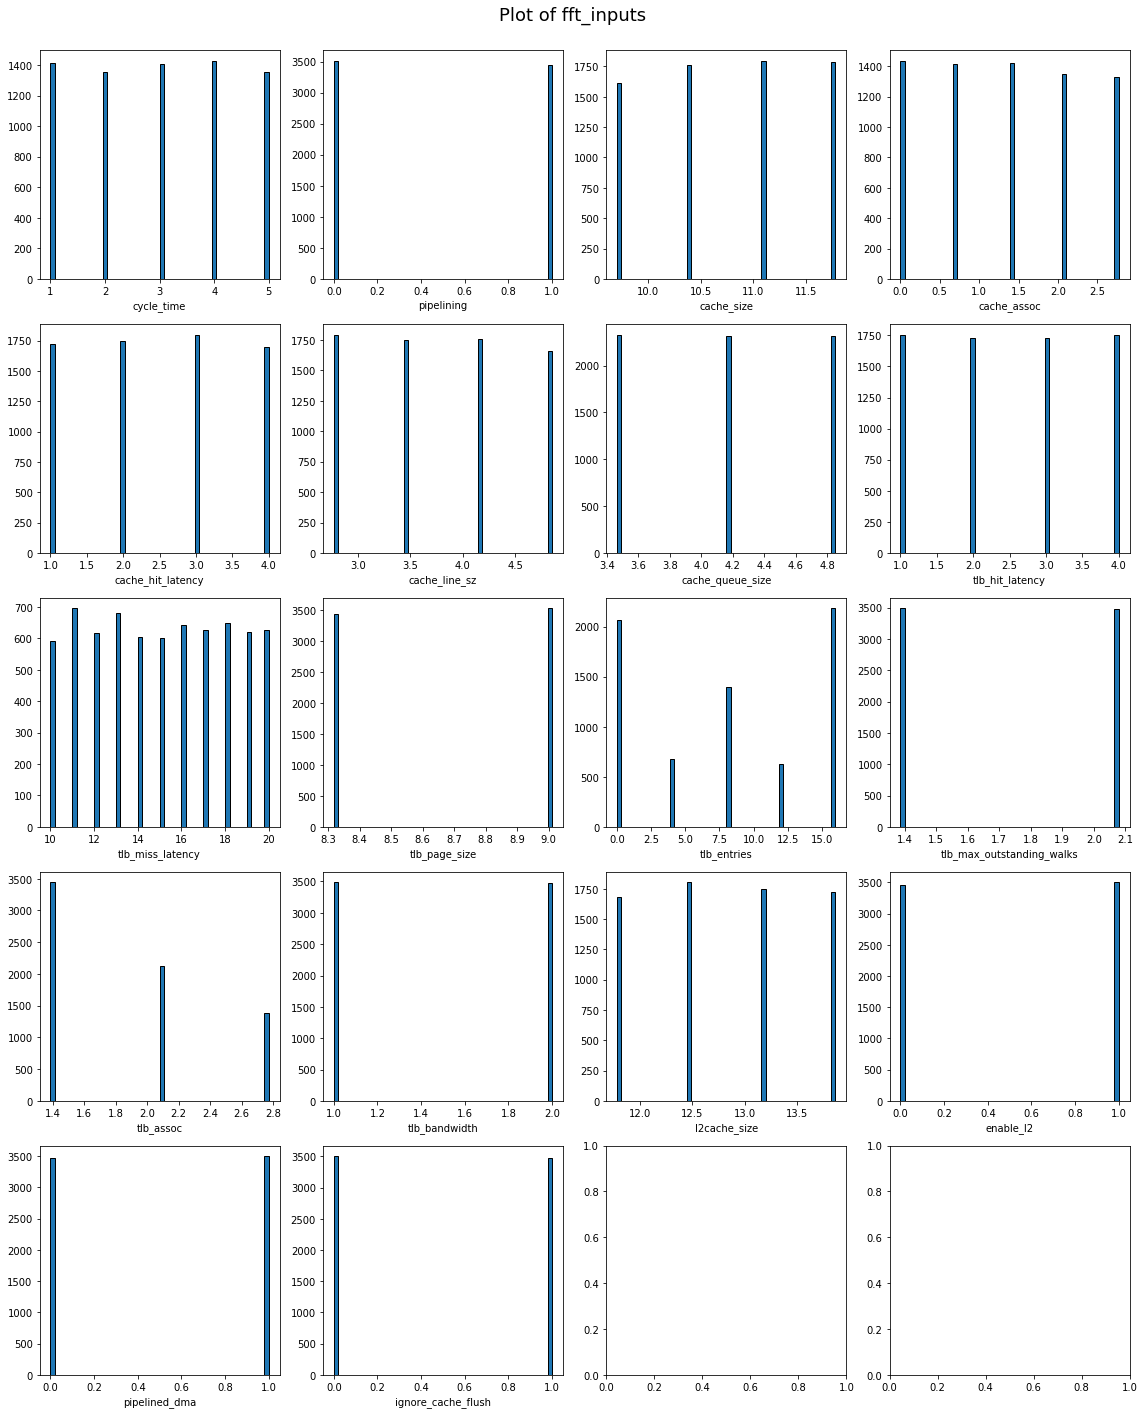

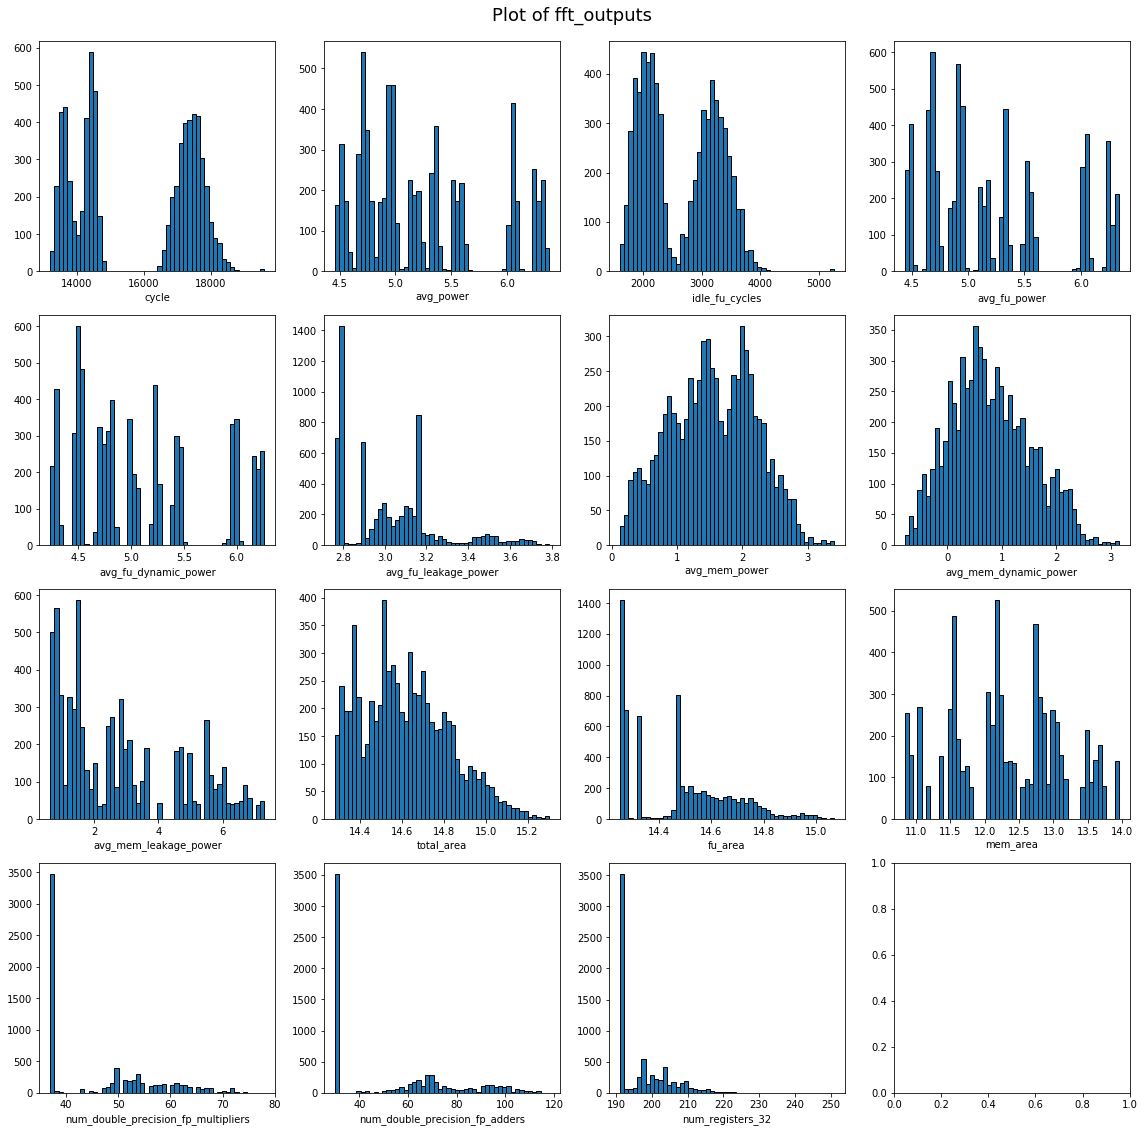

In [24]:
analysis(dataset_path=fft_path,
         name="fft",
         sep=" ",
         input_labels=label_dict["fft"]["input_labels"],
         output_labels=label_dict["fft"]["output_labels"],
         input_transforms={
             'cache_size': np.log,
             'cache_assoc': np.log,
             'cache_line_sz': np.log,
             'cache_queue_size': np.log,
             'tlb_page_size': np.log,
             'tlb_max_outstanding_walks': np.log,
             'tlb_assoc': np.log,
             'l2cache_size': np.log,
          },
         output_transforms={
             'avg_mem_power': np.log,
             'avg_mem_dynamic_power': np.log,
             'avg_fu_dynamic_power': np.log,
             'avg_fu_leakage_power': np.log,
             'avg_fu_power': np.log,
             'total_area': np.log,
             'fu_area': np.log,
             'mem_area': np.log,
             'avg_power': np.log
             
         })

# Analysis of the Stencil3D dataset

Summary: stencil3d
----------------------------------------------
Number of rows: 10799

Duplicated rows: 0

Only one value in columns: ['num_sp_multiplier', 'num_sp_adder', 'num_dp_multiplier', 'num_dp_adder', 'num_trig_unit', 'num_multiplier', 'num_adder', 'num_bit_wise', 'num_shifter']

Final inputs: ['cycle_time', 'cache_size', 'cache_assoc', 'cache_hit_latency', 'tlb_hit_latency', 'tlb_entries', 'l2cache_size']

Final outputs: ['cycle', 'avg_power', 'fu_power', 'avg_fu_dynamic_power', 'avg_fu_leakage_power', 'avg_mem_power', 'avg_mem_dynamic_power', 'avg_mem_leakage_power', 'total_area', 'fu_area', 'mem_area', 'num_register']



/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/stencil3d_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/stencil3d_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


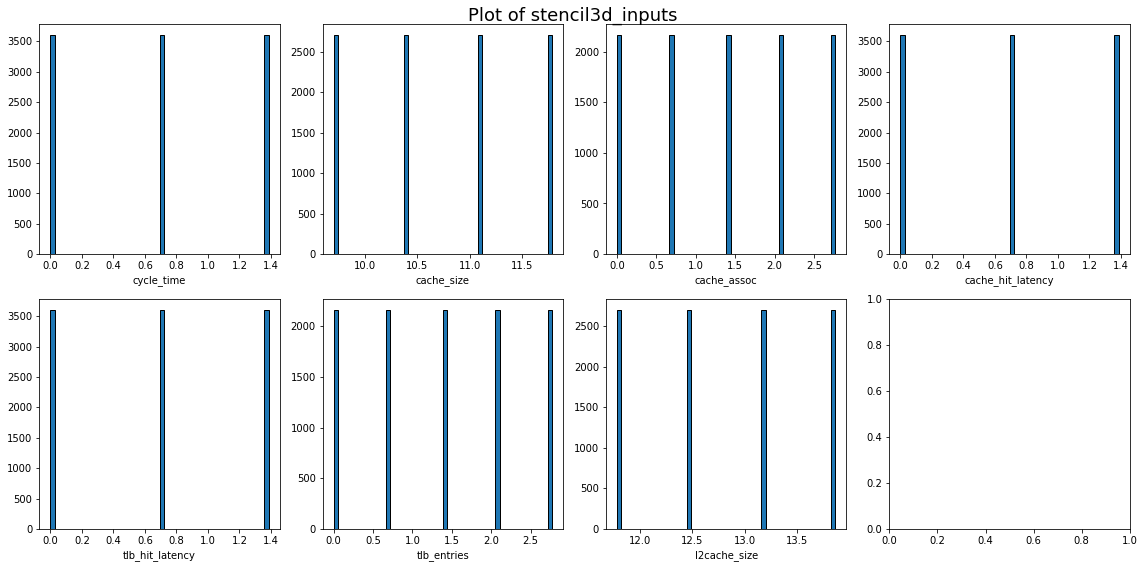

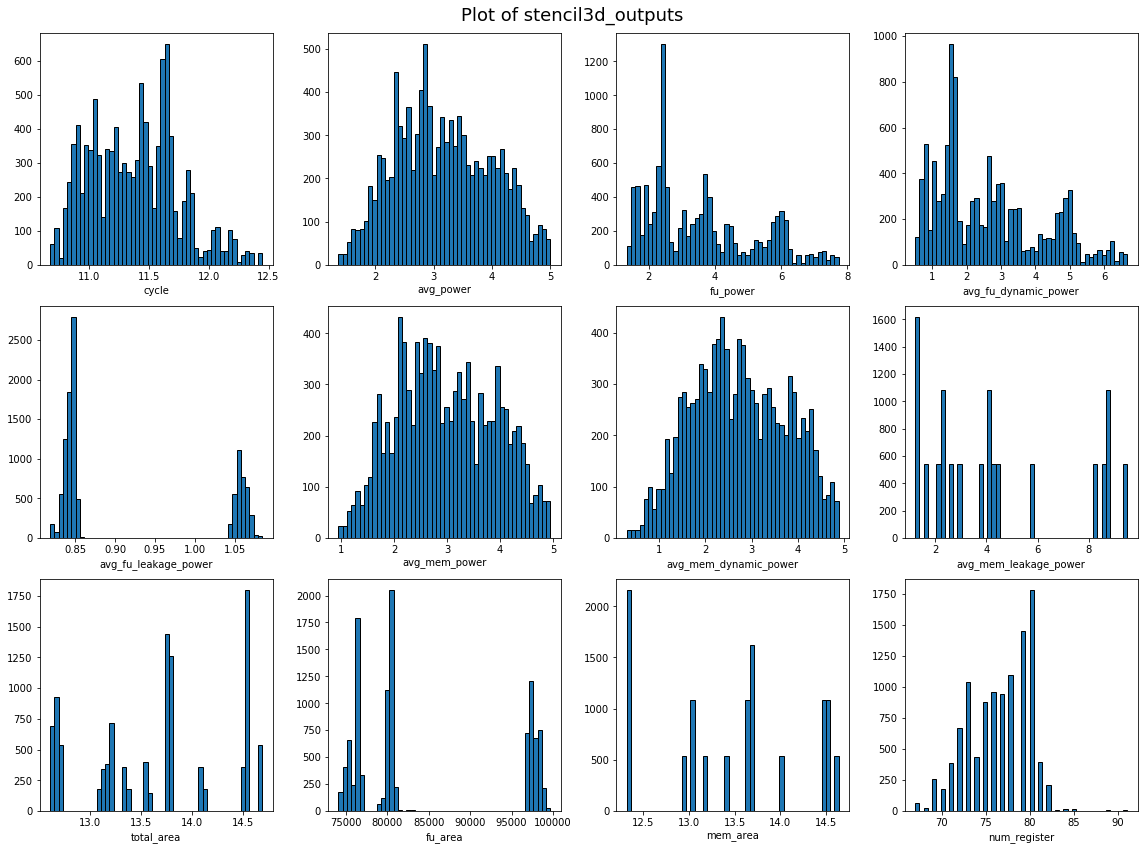

In [12]:
analysis(dataset_path=stencil3d_path,
         name="stencil3d",
         sep="\t",
         input_labels=label_dict["stencil3d"]["input_labels"],
         output_labels=label_dict["stencil3d"]["output_labels"],
         input_transforms={
             'cycle_time': np.log,
             'cache_size': np.log,
             'cache_assoc': np.log,
             'cache_hit_latency': np.log,
             'l2cache_size': np.log,
             'tlb_hit_latency': np.log,
             'tlb_entries': np.log
         },
         output_transforms={
             'cycle': np.log,
             'avg_power': np.log,
             'mem_area': np.log,
             'total_area': np.log,
             'avg_mem_power': np.log,
             'avg_mem_dynamic_power': np.log,
             
         })

Summary: gemm
----------------------------------------------
Number of rows: 10799

Duplicated rows: 0

Only one value in columns: ['num_sp_multiplier', 'num_sp_adder', 'num_dp_multiplier', 'num_dp_adder', 'num_trig_unit', 'num_multiplier', 'num_adder', 'num_bit_wise', 'num_shifter']

Final inputs: ['cycle_time', 'cache_size', 'cache_assoc', 'cache_hit_latency', 'tlb_hit_latency', 'tlb_entries', 'l2cache_size']

Final outputs: ['cycle', 'avg_power', 'fu_power', 'avg_fu_dynamic_power', 'avg_fu_leakage_power', 'avg_mem_power', 'avg_mem_dynamic_power', 'avg_mem_leakage_power', 'total_area', 'fu_area', 'mem_area', 'num_register']



/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/gemm_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/gemm_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


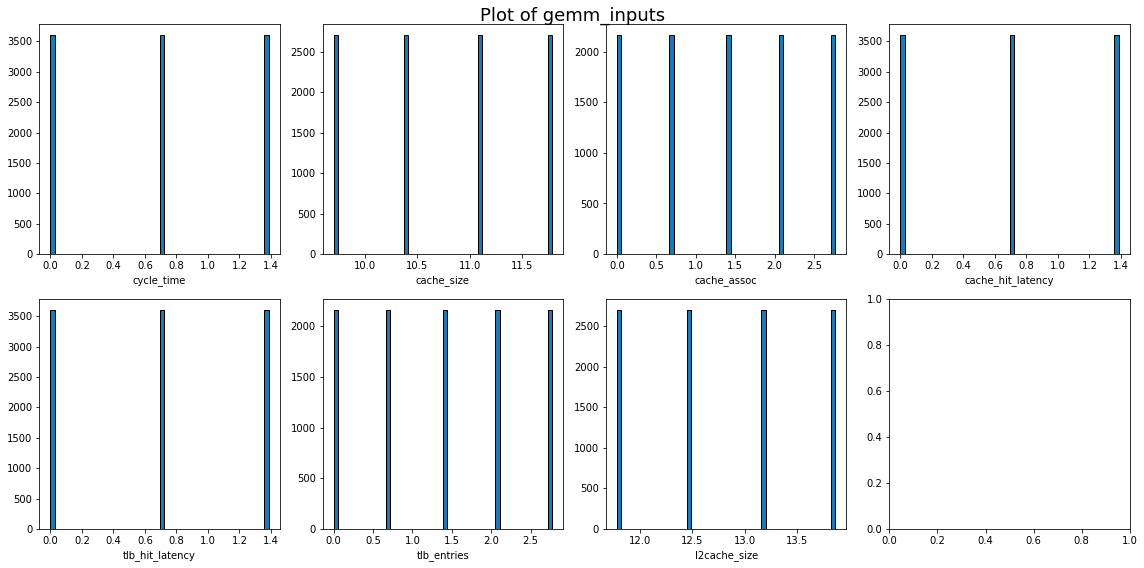

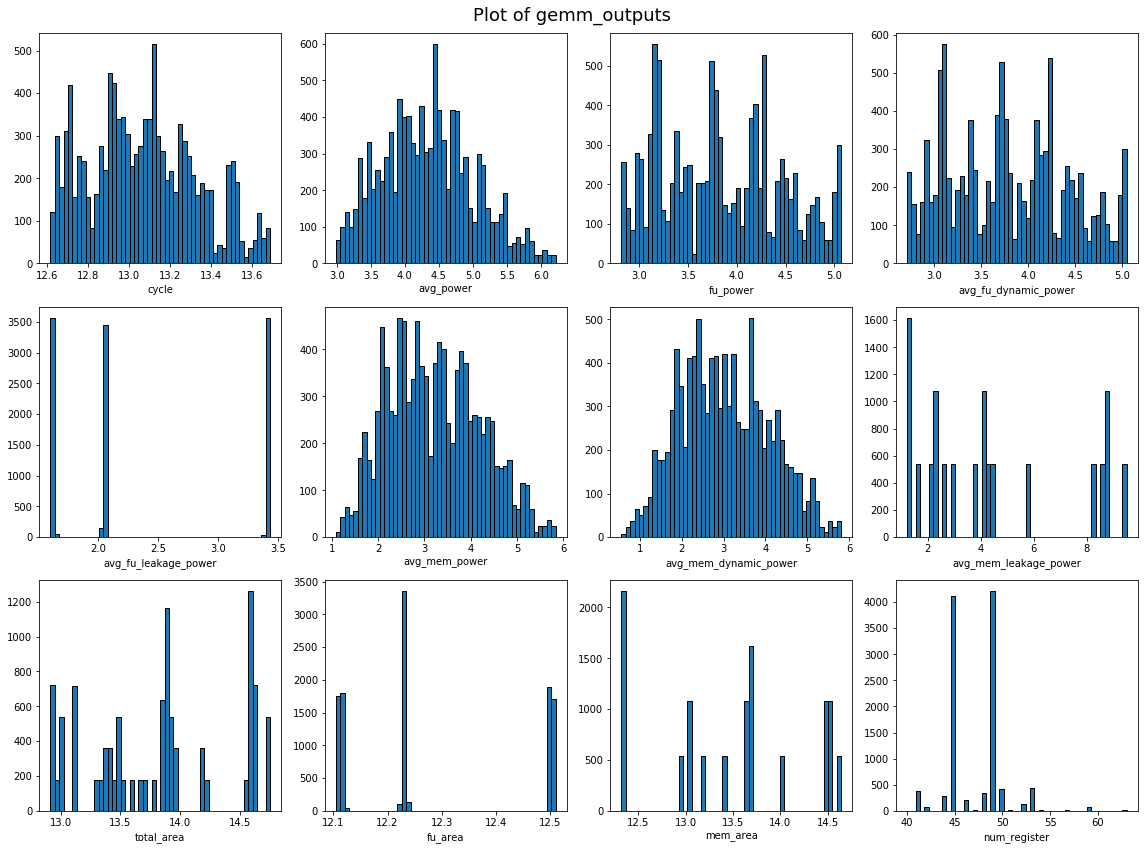

In [13]:
analysis(dataset_path=gemm_path,
         name="gemm",
         sep="\t",
         input_labels=label_dict["gemm"]["input_labels"],
         output_labels=label_dict["gemm"]["output_labels"],
        input_transforms={
             'cycle_time': np.log,
             'cache_size': np.log,
             'cache_assoc': np.log,
             'cache_hit_latency': np.log,
             'l2cache_size': np.log,
             'tlb_hit_latency': np.log,
             'tlb_entries': np.log
         },
         output_transforms={
             'cycle': np.log,
             'avg_power': np.log,
             'fu_power': np.log,
             'avg_fu_dynamic_power': np.log,
             'avg_mem_power': np.log,
             'avg_mem_dynamic_power': np.log,
             'total_area': np.log,
             'mem_area': np.log,
             'fu_area': np.log
         })

Summary: smaug
----------------------------------------------
Number of rows: 3584

Duplicated rows: 0

Only one value in columns: ['num_sp_multiplier', 'num_sp_adder', 'num_dp_multiplier', 'num_dp_adder', 'num_trig_unit']

Final inputs: ['num_threads', 'l2_assoc', 'accel_clock_time', 'dma', 'acp', 'num_accels', 'l2_size']

Final outputs: ['total_time', 'total_accel_time', 'total_energy', 'fu_energy', 'spad_energy', 'llc_leakage_energy', 'llc_dynamic_energy', 'total_area', 'fu_area', 'mem_area', 'num_multiplier', 'num_adder', 'num_bit_wise', 'num_shifter', 'num_register']



/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/smaug_inputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Saved figure to ../plots/notebook_plots/dataset_viz/smaug_outputs.pdf!


/scratch/gf332/BayesOpt/tf2-boa-venv/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


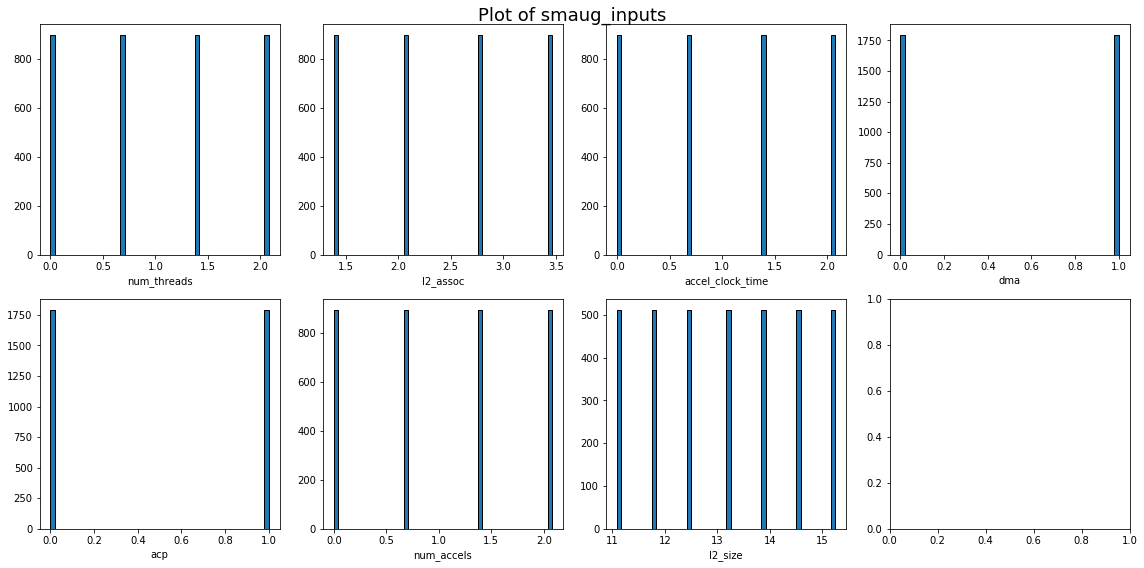

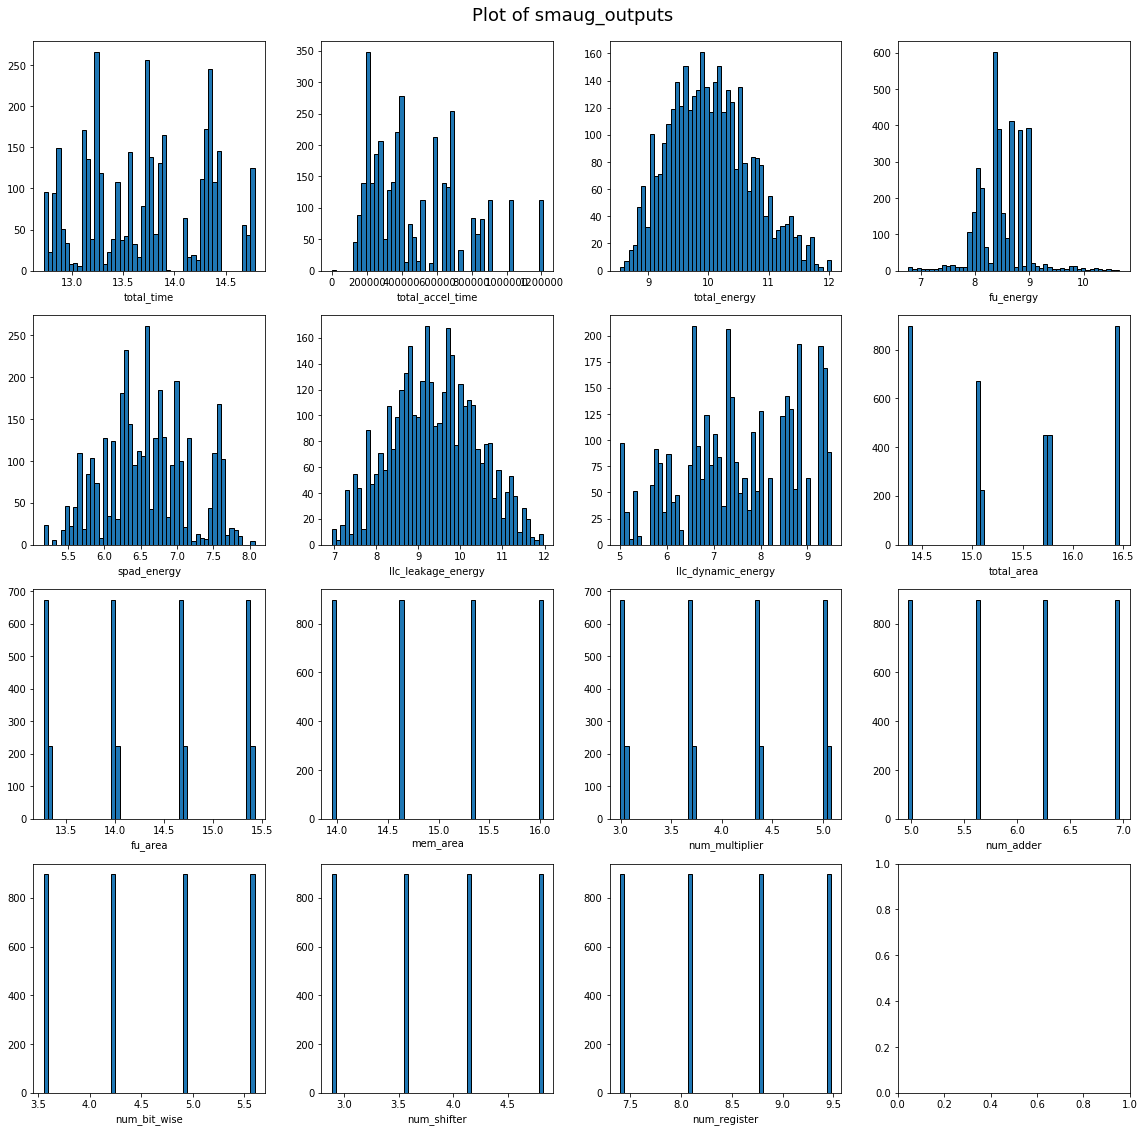

In [18]:
analysis(dataset_path=smaug_path,
         name="smaug",
         sep=",",
         input_labels=label_dict["smaug"]["input_labels"],
         output_labels=label_dict["smaug"]["output_labels"],
         input_transforms={
             'num_threads': np.log,
             'l2_assoc': np.log,
             'accel_clock_time': np.log,
             'num_accels': np.log,
             'l2_size': np.log,
          },
          output_transforms={
             'total_time': np.log,
             'total_energy': np.log,
             'fu_energy': np.log,
             'spad_energy': np.log,
             'llc_leakage_energy': np.log,
              'llc_dynamic_energy': np.log,
              'total_area': np.log,
              'fu_area': np.log,
              'mem_area': np.log,
              'num_multiplier': np.log,
              'num_adder': np.log,
              'num_bit_wise': np.log,
              'num_shifter': np.log,
              'num_register': np.log
          })